# 1. CONNECTING TO GOOGLE DRIVE
-> TO STORE THE DATA IN DRIVE
-> DRIVE LINK : https://drive.google.com/drive/folders/1dE_-f4-DYJ3KVpC9jzqFlD_9o-oaD5SH

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 2.CREATING A DATASETS FOLDER IN THE DRIVE  

In [2]:
import os

#SETTINIG PATH -> T0 STORE THE DATA IN THE BIG VISION FOLDER
big_vision_data = ('/content/drive/MyDrive/BIG VISION')

#ASSIGNING  ALL CLASSES FOLDERS
angles = ['0_deg','45_deg','90_deg','135_deg']

#CREATING A FOLDERS FOR EACH CLASS
for i in angles:
  path = os.path.join(big_vision_data,i)
  os.makedirs(path)

print("ALL THE FOLDERS ARE CREATED SUCCESSFULLY UNDER THE BIG VISION FOLDER IN THE DRIVE")



ALL THE FOLDERS ARE CREATED SUCCESSFULLY UNDER THE BIG VISION FOLDER IN THE DRIVE


## 3.IMPORT NECESSARY LIBRARIES

In [3]:
#IMPORTING THE LIB FOR GENERATION OF THE DATASET
import cv2
import numpy as np
import random

## 4.FUNCTION TO GENERATE RANDOM BACKGROUND COLOR

In [4]:
def random_color():
  #GENERATE A RANDOM BACKGROUND COLOR.
  return [random.randint(0,255) for i in range(3)]


## 5.FUNCTION TO DRAW THE LINE BASED ON ANGLE

In [5]:
def draw_line(img, angle, thickness):
    #TO DRAW A SOLID LINE AT A SPECIFIC ANGLE.

    #TO GET THE HEIGHT(h) AND WIDTH(w) , (-) -> ignore the number of channels: ex : hxw = 256x256 pixels -> h =256,w =256
    h, w, _ = img.shape

    #Find the center point of the image to draw the line from the middle : exx = center = (128, 128)
    center = (w // 2, h // 2)

    #Random choose the length of the line-> between 40 and (min height/width - 20) : if image is 256x256 - length might be 120, 200
    length = random.randint(40, min(h, w) - 20)


    #->Based on the angle it choose the startpoint(pt1) and the end point(pt2)


    # Points for 0 degree : Line is horizontal -> 	(center.x - length/2, center.y) → (left side) ,(center.x + length/2, center.y) → (right side)
    if angle == '0_deg':
        pt1 = (center[0] - length // 2, center[1])
        pt2 = (center[0] + length // 2, center[1])


    #Points for 90 degrees : Line is vertical -> (center.x, center.y - length/2) → (up),(center.x, center.y + length/2) → (down)
    elif angle == '90_deg':
        pt1 = (center[0], center[1] - length // 2)
        pt2 = (center[0], center[1] + length // 2)

    #Points for 45 degrees : Line is diagonal (bottom-left to top-right) -> (center.x - length/2, center.y + length/2) → (bottom-left),(center.x + length/2, center.y - length/2) → (top-right)
    elif angle == '45_deg':
        pt1 = (center[0] - length // 2, center[1] + length // 2)
        pt2 = (center[0] + length // 2, center[1] - length // 2)

    #Points for 135 degrees : Line is diagonal (top-left to bottom-right) ->(center.x - length/2, center.y - length/2) → (top-left) ,(center.x + length/2, center.y + length/2) → (bottom-right)
    elif angle == '135_deg':
        pt1 = (center[0] - length // 2, center[1] - length // 2)
        pt2 = (center[0] + length // 2, center[1] + length // 2)
    #setting color as balck
    color = (0, 0, 0)

    # draw the line on the image from pt1 to pt2 with the thickness
    cv2.line(img, pt1, pt2, color, thickness)
    return img


## GENERATING SYNTHETIC IMAGES AND SAVE TO THE CORRESPONDING DEGREES FOLDER IN THE DRIVE

In [6]:
import numpy as np
# assing how many image we want for each class to save in the respective folders of angles
image_per_class = 500

for i in angles:
  for j in range(image_per_class):
    # Create a blank white image -> create a 128x128 image :np.ones() → Fills with ones → Multiply by 255 → (255,255,255).
    img = np.ones((128,128,3) , dtype = np.uint8) * 255

    # Set random background -> fill the whole image with that random color.
    bg_color = random_color()
    img[:] = bg_color

    #Random thickness between 2 and 6 -> different widths, again helping the model generalize better.
    thickness = random.randint(2, 6)

    # Draw line ->call the draw_line() ->draws a line at the given angle with the random thickness -> On the random background image.
    img = draw_line(img, i, thickness)

    #to save the image in the drive to respective folders
    save_path = os.path.join(big_vision_data, i, f'{i}_{j}.png')
    cv2.imwrite(save_path, img)


print("DATASET GENERATION COMPLETED SUCCESSFULLY TO CORRESPOING ANGLES FOLDER")





DATASET GENERATION COMPLETED SUCCESSFULLY TO CORRESPOING ANGLES FOLDER


# 7. LOAD THE DATASET

## 7.1 IMPORT REQURIED LIBRARAIES FOR MODEL TRAINING

In [7]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split



## 7.2 SETTING FOLDER PATH TO LOAD THE DATASET -> images are stored inside Google Drive.

In [8]:
# DATASET FOLDER PATH
big_vision_data = '/content/drive/MyDrive/BIG VISION'

#4 classes (angles)
angles = ['0_deg', '45_deg', '90_deg', '135_deg']

# Empty lists to store images and labels -> X will store all the image data , Y will store the the corresponding labels (0, 45, 90, or 135).
X = []
Y = []

# Loop through each angle folder
for angle in angles:
    folder_path = os.path.join(big_vision_data, angle)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        # Read image
        img = cv2.imread(img_path)
        # Resize if needed
        img = cv2.resize(img, (128, 128))
        X.append(img)
        ## Label as 0, 45, 90, or 135
        Y.append(int(angle.split('_')[0]))

#Convert List into Numpy Arrays
x = np.array(X)
y = np.array(Y)

print(f"Total Images Loaded: {len(X)}")
print(f"Shape of X: {x.shape}")
print(f"Shape of y: {y.shape}")
print("DATASET LOADED SUCCESSFULLY")



Total Images Loaded: 2000
Shape of X: (2000, 128, 128, 3)
Shape of y: (2000,)
DATASET LOADED SUCCESSFULLY


# 8. PREPARAING THE DATA FOR CNN MODEL

## 8.1 NORMALIZAION ->  0 to 255 (white = 255, black = 0)-> 255 scales the pixel values into the range [0, 1].

In [9]:
# Normalize the image data to the range [0, 1]
X = x.astype('float32') / 255.0

# Check the normalization by printing the min and max values
print(f"Min value of X: {X.min()}, Max value of X: {X.max()}")


Min value of X: 0.0, Max value of X: 1.0


## 8.1.1 VISUAL ON Normalization

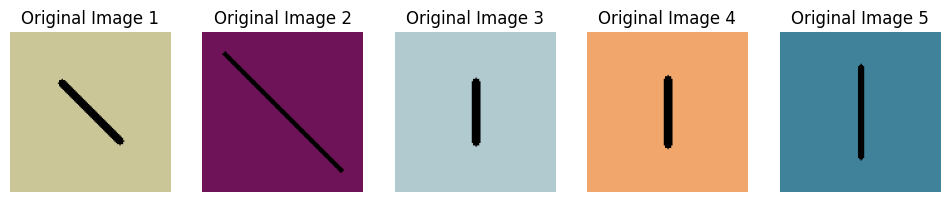

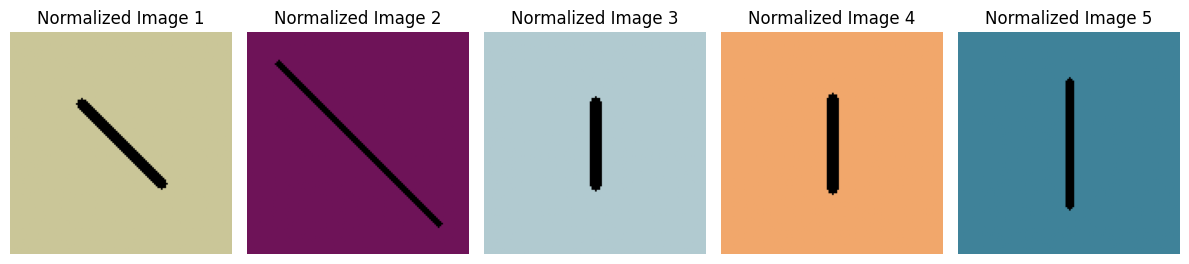

In [47]:
import matplotlib.pyplot as plt

# Pick a few random images before normalization
indices = [random.randint(0, len(X) - 1) for _ in range(5)]
before_normalized_images = x[indices]  # Original images (before normalization)

# Plot the images before normalization
plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(before_normalized_images[i].astype('uint8'))
    plt.title(f"Original Image {i+1}")
    plt.axis('off')

# Now, plot the images after normalization
plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[indices[i]])  # After normalization
    plt.title(f"Normalized Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## 8.1.2 BEFORE VS AFTER

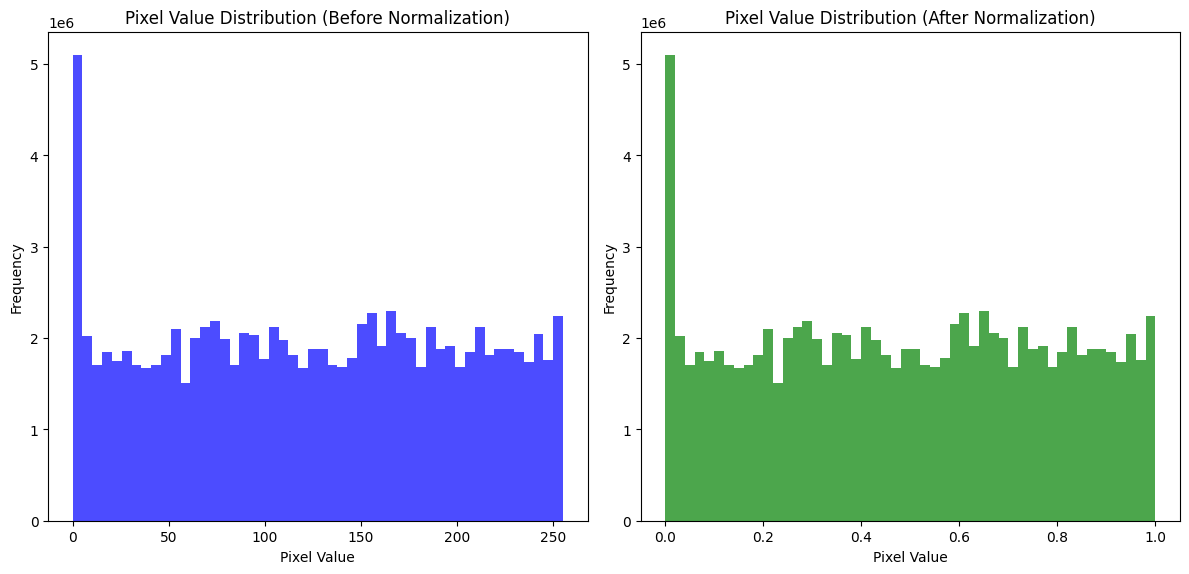

In [48]:
# Plot histogram of pixel values before and after normalization
plt.figure(figsize=(12, 6))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(x.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution (Before Normalization)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# After normalization
plt.subplot(1, 2, 2)
plt.hist(X.flatten(), bins=50, color='green', alpha=0.7)
plt.title("Pixel Value Distribution (After Normalization)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## 8.2 ONE_HOT ENCODING

In [10]:
from tensorflow.keras.utils import to_categorical

# Convert angles (0, 45, 90, 135) to integers (0, 1, 2, 3)
y = np.array([0 if label == 0 else 1 if label == 45 else 2 if label == 90 else 3 for label in y])

# One-hot encode the labels
y = to_categorical(y, num_classes=4)  # 4 classes (0, 45, 90, 135)

# Check the one-hot encoding output
print(f"One-hot encoded y shape: {y.shape}")
print(f"First 5 labels in y (one-hot encoded):\n{y[:5]}")


One-hot encoded y shape: (2000, 4)
First 5 labels in y (one-hot encoded):
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


## 8.2.1 VISUAL ON AFTER ONE HOT-ENCODING

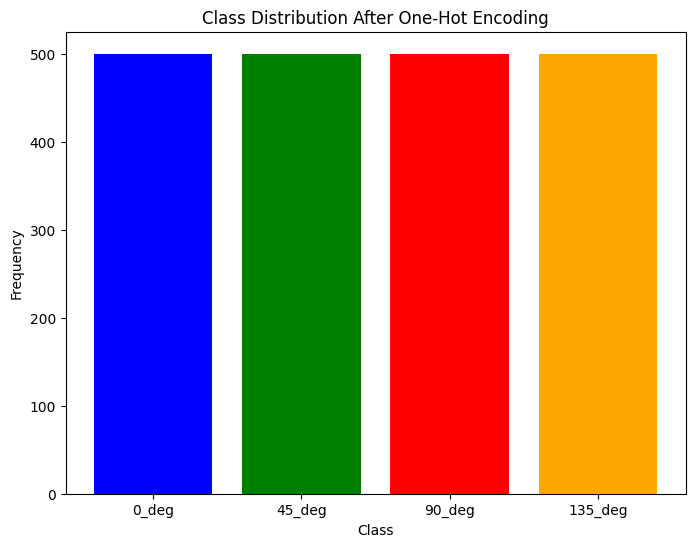

In [52]:
# Plot the distribution of each class (0, 45, 90, 135)
class_distribution = np.sum(y, axis=0)

# Create bar plot for class distribution
labels = ['0_deg', '45_deg', '90_deg', '135_deg']

plt.figure(figsize=(8, 6))
plt.bar(labels, class_distribution, color=['blue', 'green', 'red', 'orange'])
plt.title("Class Distribution After One-Hot Encoding")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


## 8.3 SPLITING  THE DATASET -> [TRAIN] ,[TEST]

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Print the shapes of the train and test sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Training set size: (1400, 128, 128, 3)
Testing set size: (600, 128, 128, 3)
Shape of y_train: (1400, 4)
Shape of y_test: (600, 4)


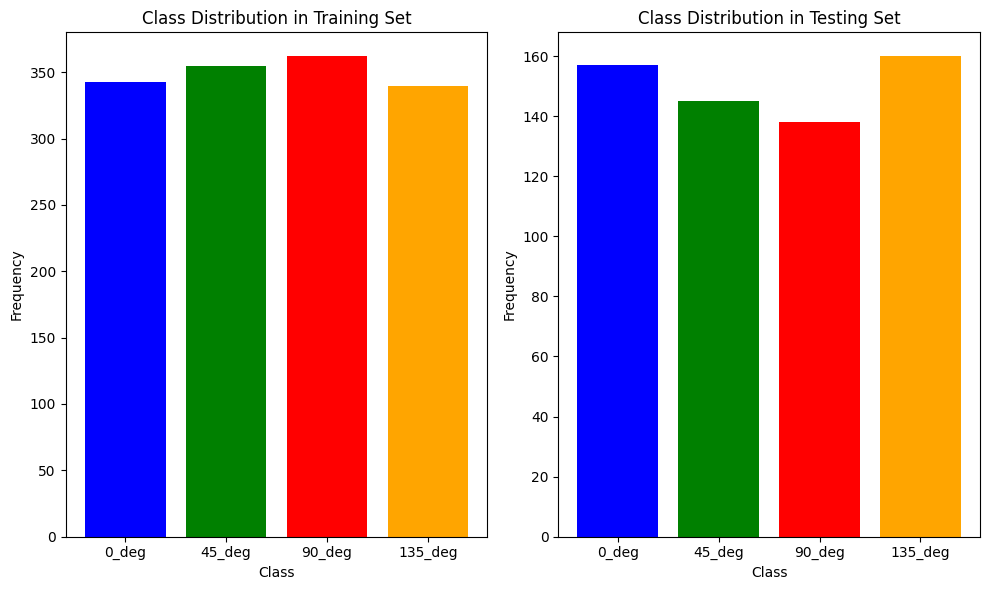

Training set size: (1400, 128, 128, 3)
Testing set size: (600, 128, 128, 3)
Shape of y_train: (1400, 4)
Shape of y_test: (600, 4)


In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Get class distribution in the training and testing sets
train_class_distribution = np.sum(y_train, axis=0)
test_class_distribution = np.sum(y_test, axis=0)

# Labels for the classes
labels = ['0_deg', '45_deg', '90_deg', '135_deg']

# Plot the class distribution for training and testing sets
plt.figure(figsize=(10, 6))

# Training set distribution
plt.subplot(1, 2, 1)
plt.bar(labels, train_class_distribution, color=['blue', 'green', 'red', 'orange'])
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Testing set distribution
plt.subplot(1, 2, 2)
plt.bar(labels, test_class_distribution, color=['blue', 'green', 'red', 'orange'])
plt.title("Class Distribution in Testing Set")
plt.xlabel("Class")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Print the shapes of the train and test sets
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


# 9. CNN MODEL

## 9.1 IMPORT NECESSARY LIB

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall

## 9.2 LOADING THE MODEL ARCHITECTURE

In [13]:
#Create the Model -> Sequential method — stacking layers one after another.
model = Sequential([
    #First Convolution-> Adding a Conv2D layer ->32 filters → each filter tries to detect different features (like lines, corners, edges)->
     #(3,3) → Size of each filter (small 3x3 window) -> activation='relu' → Add non-linearity (remove negative values) -> input_shape=(128, 128, 3) → Expecting 128x128 color images (3 = RGB channels)
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),

    #Pool the output of Conv2D -> Shrinks the image by taking the maximum pixel in every 2x2 block ->Helps reduce image size and retain important features.
    MaxPooling2D(pool_size=(2, 2)),

    #Second Convolution -> New Conv2D layer with 64 filters (model learning more complex features).
    Conv2D(64, (3, 3), activation='relu'),

    #Again apply max pooling to reduce size
    MaxPooling2D(pool_size=(2, 2)),

    #Third Convolution -> More filters → now 128 filters for even higher-level features.
    Conv2D(128, (3, 3), activation='relu'),

    #Again pooling to compress and clean feature maps.
    MaxPooling2D(pool_size=(2, 2)),

    #Flattening Layer->Now you flatten (convert) the 3D feature map into a 1D vector.
    Flatten(),

    #Dense Fully Connected Layers ->
    Dense(128, activation='relu'),

    #DROPOUT -> During training, randomly turn off 50% of neurons->This forces the model to learn better and avoids overfitting (memorizing training data).
    Dropout(0.5),

    #OUTPUT LAYER ->Final Dense layer with 4 neurons → because you have 4 classes (0°, 45°, 90°, 135°).
    Dense(4, activation='softmax')  # 4 classes
])

# Compile the model ->Adam → adjusts weights efficiently during training.->categorical_crossentropy → used when you have multi-class classification.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

## 9.3 TRAIN THE CNN MODEL

In [19]:
import os

# Define the path to the weights directory
weights_path = '/content/drive/MyDrive/BIG VISION/weights/'

# Create the directory if it doesn't exist
os.makedirs(weights_path, exist_ok=True)

# Save only the weights
model.save_weights(os.path.join(weights_path, 'cnn_model_weights.weights.h5'))


In [20]:
import os

# Define the folder path to save the model and weights
save_path = '/content/drive/MyDrive/BIG VISION/'
weights_path = os.path.join(save_path, 'weights')  # Create a 'weights' folder

# Create 'weights' folder if it does not exist
if not os.path.exists(weights_path):
    os.makedirs(weights_path)

# Train the CNN model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# Saving the model
model.save(save_path + 'cnn_model.h5')

# Save only the weights
model.save_weights(os.path.join(weights_path, 'cnn_model_weights.weights.h5'))

# Optionally save the model architecture as a JSON file
model_json = model.to_json()
with open(save_path + "cnn_model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Optionally save the training history (loss, accuracy)
import pickle
with open(save_path + "training_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

print(f"Model and weights saved at {save_path}")


Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 1.0000 - loss: 9.1731e-05 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 7.7123e-07 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 1.0000 - loss: 1.8836e-05 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.1248e-06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 1.0000 - loss: 9.4078e-06 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.2726e-06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 1.0000 - loss: 1.2445e-05 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_loss: 1.0172e-06 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 1.0000 - loss: 6.6347e-05 - precision: 1.0000 - recall: 1.0000 - val_accur

Model and weights saved at /content/drive/MyDrive/BIG VISION/


# 10.  Evaluate Model on Test Set

In [25]:
#  Get predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels


19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step


# 10.1 classification_report

In [26]:
from sklearn.metrics import classification_report

#  Classification report
y_true = np.argmax(y_test, axis=1)  # Convert y_test to class labels (from one-hot encoding)
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       145
           2       1.00      1.00      1.00       138
           3       1.00      1.00      1.00       160

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



## 10.2 confusion_matrix

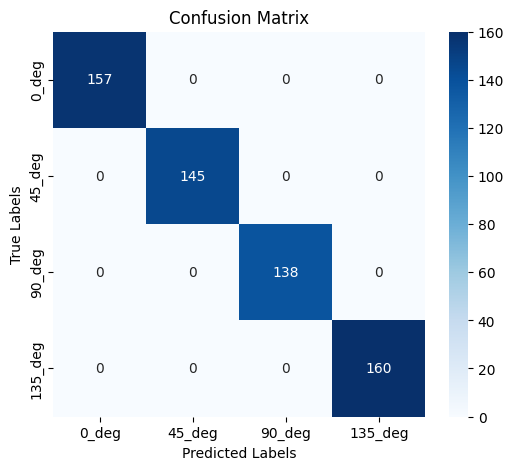

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=angles, yticklabels=angles)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## 10.3 ACCURACY AND LOSS

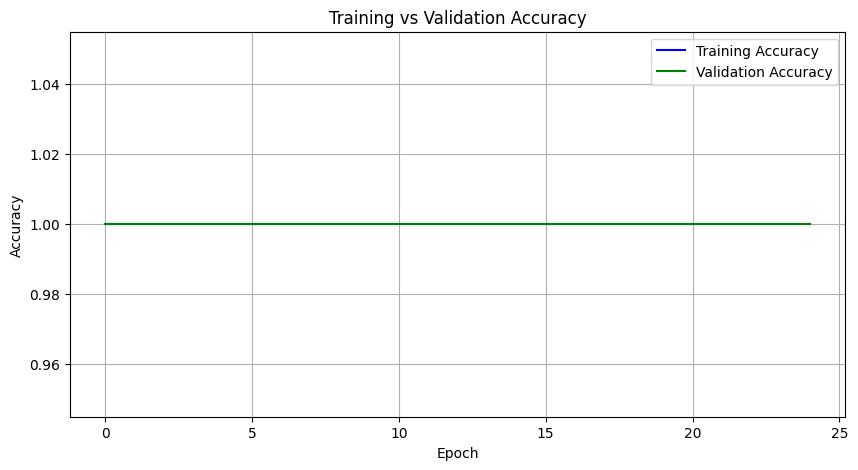

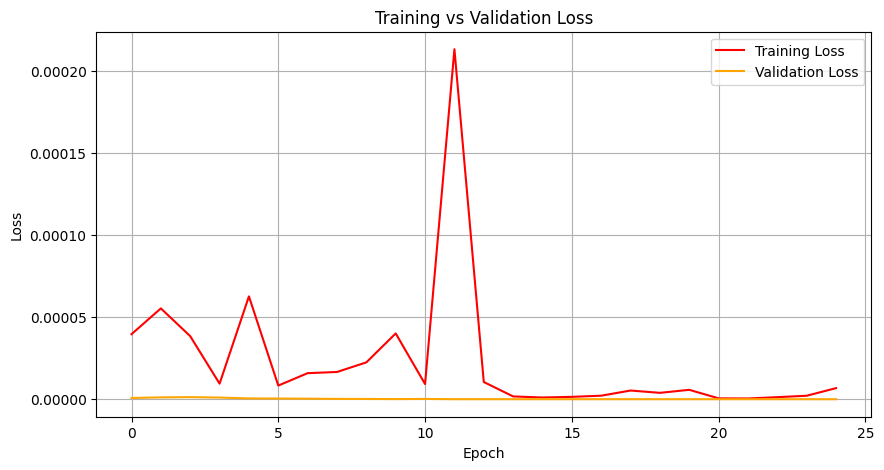

In [45]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


# 11. Predict Each Image for the Classes:

# 11.1 0° Image Prediction (Class 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Prediction for 0° image: Class 0 (0_deg)


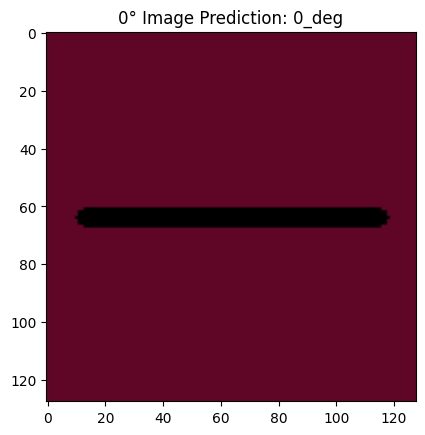

In [30]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image (0° image)
img_path_0 = '/content/drive/MyDrive/BIG VISION/0_deg/0_deg_1.png'  # Update the image path

# Load image, resize to 128x128, and preprocess
img_0 = image.load_img(img_path_0, target_size=(128, 128))
img_0_array = image.img_to_array(img_0) / 255.0  # Normalize
img_0_array = np.expand_dims(img_0_array, axis=0)  # Add batch dimension

# Make prediction
prediction_0 = model.predict(img_0_array)

# Print the prediction (class with highest probability)
pred_class_0 = np.argmax(prediction_0)
print(f"Prediction for 0° image: Class {pred_class_0} ({angles[pred_class_0]})")

# Display the image
plt.imshow(img_0)
plt.title(f"0° Image Prediction: {angles[pred_class_0]}")
plt.show()


# 11.2  45° Image Prediction (Class 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction for 45° image: Class 1 (45_deg)


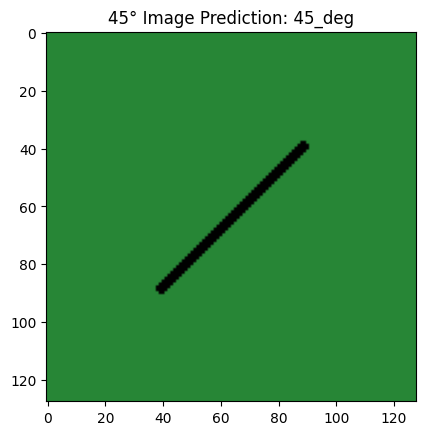

In [31]:
# Load and preprocess the image (45° image)
img_path_45 = '/content/drive/MyDrive/BIG VISION/45_deg/45_deg_102.png' # Update the image path

# Load image, resize to 128x128, and preprocess
img_45 = image.load_img(img_path_45, target_size=(128, 128))
img_45_array = image.img_to_array(img_45) / 255.0  # Normalize
img_45_array = np.expand_dims(img_45_array, axis=0)  # Add batch dimension

# Make prediction
prediction_45 = model.predict(img_45_array)

# Print the prediction (class with highest probability)
pred_class_45 = np.argmax(prediction_45)
print(f"Prediction for 45° image: Class {pred_class_45} ({angles[pred_class_45]})")

# Display the image
plt.imshow(img_45)
plt.title(f"45° Image Prediction: {angles[pred_class_45]}")
plt.show()


# 11.3 90° Image Prediction (Class 2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction for 90° image: Class 2 (90_deg)


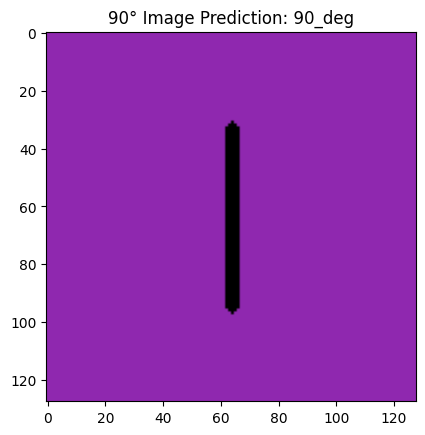

In [32]:
# Load and preprocess the image (90° image)
img_path_90 = '/content/drive/MyDrive/BIG VISION/90_deg/90_deg_101.png'  # Update the image path

# Load image, resize to 128x128, and preprocess
img_90 = image.load_img(img_path_90, target_size=(128, 128))
img_90_array = image.img_to_array(img_90) / 255.0  # Normalize
img_90_array = np.expand_dims(img_90_array, axis=0)  # Add batch dimension

# Make prediction
prediction_90 = model.predict(img_90_array)

# Print the prediction (class with highest probability)
pred_class_90 = np.argmax(prediction_90)
print(f"Prediction for 90° image: Class {pred_class_90} ({angles[pred_class_90]})")

# Display the image
plt.imshow(img_90)
plt.title(f"90° Image Prediction: {angles[pred_class_90]}")
plt.show()


# 11.4 135° Image Prediction (Class 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediction for 135° image: Class 3 (135_deg)


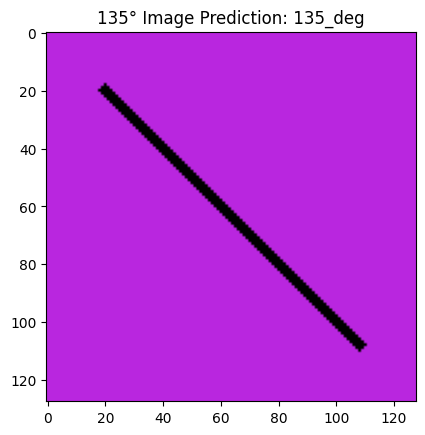

In [33]:
# Load and preprocess the image (135° image)
img_path_135 = '/content/drive/MyDrive/BIG VISION/135_deg/135_deg_0.png'  # Update the image path

# Load image, resize to 128x128, and preprocess
img_135 = image.load_img(img_path_135, target_size=(128, 128))
img_135_array = image.img_to_array(img_135) / 255.0  # Normalize
img_135_array = np.expand_dims(img_135_array, axis=0)  # Add batch dimension

# Make prediction
prediction_135 = model.predict(img_135_array)

# Print the prediction (class with highest probability)
pred_class_135 = np.argmax(prediction_135)
print(f"Prediction for 135° image: Class {pred_class_135} ({angles[pred_class_135]})")

# Display the image
plt.imshow(img_135)
plt.title(f"135° Image Prediction: {angles[pred_class_135]}")
plt.show()


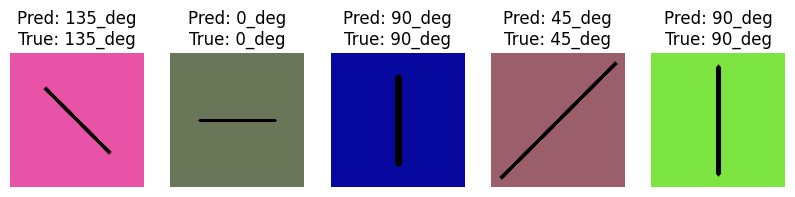

In [57]:
# Visualize some test images with predictions
plt.figure(figsize=(10, 6))

# Randomly select 5 images from the test set
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {angles[np.argmax(y_pred[i])]}\nTrue: {angles[np.argmax(y_test[i])]}")
    plt.axis('off')

plt.show()


In [55]:
# Evaluate the model on the test set
evaluation = model.evaluate(X_test, y_test, verbose=2)

# If you're using multiple metrics, print them accordingly
# For example, if your model includes accuracy and loss, evaluation will have [loss, accuracy]
test_loss = evaluation[0]
test_acc = evaluation[1]

print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


19/19 - 10s - 536ms/step - accuracy: 1.0000 - loss: 8.5433e-09 - precision_1: 1.0000 - recall_1: 1.0000
Test Accuracy: 1.0000
Test Loss: 0.0000
